## Gamma-Gamma Distribution of AGP

* Bruce Hardie plots at http://www.brucehardie.com/notes/025/gamma_gamma.pdf
* Here are plots for our AGP distributions

In [1]:
import os
import sys
import pandas as pd
from tqdm import tqdm
from pathlib import Path
from kedro.framework.context import load_context
sys.path.append("..")
from src.lifetime_dev.VPLifetimesData import VPLifetimesData
pd.options.display.max_columns = 50

project_path = Path(os.getcwd()).parents[0].resolve()  # TBD: getcwd() may depend on where jupyter was started?
context = load_context(project_path)

orders_df = context.catalog.load("ie_es_2010_2020")
orders_df['order_date_dt'] = pd.to_datetime(orders_df.ORDER_DATE, format='%Y-%m-%d')
orders_df.AGP_BUDGET_USD = orders_df.AGP_BUDGET_USD.astype('float64')

2020-08-04 14:40:12,261 - kedro.io.data_catalog - INFO - Loading data from `ie_es_2010_2020` (PickleDataSet)...


c:\users\mandersen\anaconda3\envs\py37\lib\site-packages\kedro\framework\context\context.py:538: UserWarning: Credentials not found in your Kedro project config.
No files found in ['C:\\repo\\lifetime-dev\\conf\\base', 'C:\\repo\\lifetime-dev\\conf\\local'] matching the glob pattern(s): ['credentials*', 'credentials*/**', '**/credentials*']
  str(exc)


## Nonparametric Distribution

In [3]:
country = 'ES'
country_field = 'ACCOUNT_CREATION_COUNTRY'
country_df = orders_df[orders_df[country_field] == country]
life_data = VPLifetimesData(country_df)
summary = life_data.get_summary_data_from_transaction()
    

In [4]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 906143 entries, 000003KR4PTIGWEREP6M1GSHN4G4WNO2 to d2FyaG9s-FFFE5EF0B9E493DD29355ED13278D9E6
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   frequency       906143 non-null  float64
 1   recency         906143 non-null  float64
 2   T               906143 non-null  float64
 3   monetary_value  906143 non-null  float64
dtypes: float64(4)
memory usage: 74.6+ MB


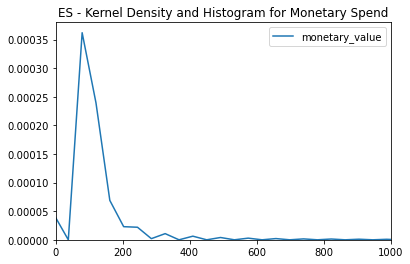

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# bw looks irrelevant so only draw the one
pos = summary[summary.monetary_value>0]
if False:
    ax = sns.kdeplot(pos.monetary_value, bw='silverman')
    ax.set_xlim(0, 1000)
    ax.set_title('Kernel Density and Histogram for Monetary Spend')
    plt.show()

ax = sns.kdeplot(pos.monetary_value, bw='scott')
ax.set_xlim(0, 1000)
ax.set_title(f'{country} - Kernel Density and Histogram for Monetary Spend')
plt.show()

In [28]:
# pandas slow at kde plots
# pos.monetary_value.plot.density(bw_method='silverman')

In [29]:
pos.monetary_value.describe()

count    326233.000000
mean         24.433386
std          27.763565
min           0.000080
25%          10.415480
50%          18.424958
75%          30.224000
max        5242.153520
Name: monetary_value, dtype: float64

(0.0, 200.0)

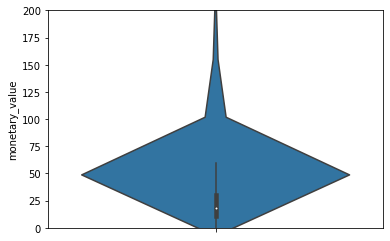

In [43]:
ax = sns.violinplot(y=pos.monetary_value)
ax.set_ylim(0, 200)

Text(0.5, 0, 'Repeat Frequency')

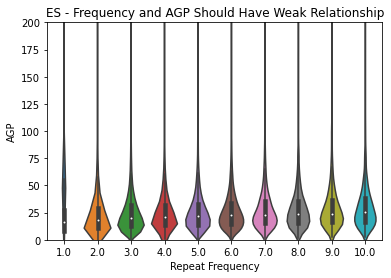

In [40]:
max_frequency = 10
pos_ranged = pos[pos.frequency<=max_frequency]
ax = sns.violinplot(y=pos_ranged.monetary_value, x=pos_ranged.frequency)
ax.set_ylim(0, 200)
ax.set_title(f'{country} - Frequency and AGP Should Have Weak Relationship')
ax.set_ylabel('AGP')
ax.set_xlabel('Repeat Frequency')

In [44]:
pos_ranged[pos_ranged.frequency==1].describe()

frequency        recency              T  monetary_value
count   153807.0  153807.000000  153807.000000   153807.000000
mean         1.0     434.195147    2275.299817       22.552037
std          0.0     530.856390     918.253151       31.313981
min          1.0       1.000000       2.000000        0.000080
25%          1.0      46.000000    1609.000000        8.390680
50%          1.0     267.000000    2420.000000       15.989060
75%          1.0     607.000000    3054.000000       27.410145
max          1.0    3638.000000    3684.000000     5242.153520

In [56]:
pos_ranged[pos_ranged.frequency==2].describe()

frequency       recency             T  monetary_value
count    66767.0  66767.000000  66767.000000    66767.000000
mean         2.0    778.013749   2352.231072       24.055686
std          0.0    652.406916    878.783417       25.273372
min          2.0      2.000000     12.000000        0.020425
25%          2.0    293.000000   1697.000000       10.852410
50%          2.0    646.000000   2447.000000       18.237125
75%          2.0   1099.000000   3103.000000       29.621750
max          2.0   3624.000000   3684.000000     1587.738620

## High Spenders

* Are these outliers in any bad sense?
* Or can we include them in the distribution?

In [46]:
f = pos[pos.monetary_value > 1000]
f


frequency  recency       T  monetary_value
SHOPPER_ID                                                                  
2HUIK0W7XF0TKUK45607J0O6U66NT7VD        2.0    314.0   613.0     1289.134285
411T3M37G241IDEN17OF3NI30GSDUS0U        2.0    395.0   403.0     1323.390197
D40XS1KMQ6FDFFQ5QOV3ERS10QXVIMSV        2.0    735.0   991.0     1587.738620
DE0UIFELPIDMH5OG4KT0UNMJI6S347VK        1.0     24.0  3228.0     1047.905360
FDD4KIOOTNX637G47M7J75DHGO03JOV0        1.0    383.0   570.0     2308.133260
GD1QFPJV3RKRPLII0F4EUO445XEROS1L        1.0     31.0   299.0     5242.153520
GTH5WMW7EJIKK4Q2FFDLF01GZEENE72G        1.0    357.0   592.0     1101.658440
GTHHVDL3WDW21TMLVLJQGQILN5UJ30FD        4.0    771.0   964.0     1000.578555
R1PTZQ3RGK2V67MUWO3XXIW0SPO3ONJL        1.0      1.0   262.0     1296.608120

### The big spenders are not high frequency

* Good that we're not seeing such a relationship

### Investigation
* GD1QFPJV3RKRPLII0F4EUO445XEROS1L
* Massive clothing purchases

In [47]:
orders_df[orders_df.SHOPPER_ID=='GD1QFPJV3RKRPLII0F4EUO445XEROS1L']

SHOPPER_ID  ORDER_DATE TOTAL_BOOKINGS_USD  \
1040346  GD1QFPJV3RKRPLII0F4EUO445XEROS1L  2019-10-07         517.169030   
1040347  GD1QFPJV3RKRPLII0F4EUO445XEROS1L  2019-11-07        7115.293220   

         AGP_BUDGET_USD ACCOUNT_CREATION_COUNTRY    FIRST_ORDER_DATETIME  \
1040346       203.07663                       ES 2019-10-08 02:35:36.600   
1040347      5242.15352                       ES 2019-10-08 02:35:36.600   

        order_date_dt  
1040346    2019-10-07  
1040347    2019-11-07

### Investigation
* FDD4KIOOTNX637G47M7J75DHGO03JOV0
* Bought 500 wall calendars

In [48]:
orders_df[orders_df.SHOPPER_ID=='FDD4KIOOTNX637G47M7J75DHGO03JOV0']

SHOPPER_ID  ORDER_DATE TOTAL_BOOKINGS_USD  \
581720  FDD4KIOOTNX637G47M7J75DHGO03JOV0  2020-01-27        3143.631260   
581721  FDD4KIOOTNX637G47M7J75DHGO03JOV0  2019-01-09        3039.169630   

        AGP_BUDGET_USD ACCOUNT_CREATION_COUNTRY    FIRST_ORDER_DATETIME  \
581720      2308.13326                       ES 2019-01-09 12:28:15.720   
581721      1827.65493                       ES 2019-01-09 12:28:15.720   

       order_date_dt  
581720    2020-01-27  
581721    2019-01-09

### Investigation
* D40XS1KMQ6FDFFQ5QOV3ERS10QXVIMSV
* Bought 575 wall calendars